In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("AAPL", start="2003-10-30", end="2023-10-30")

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<Axes: xlabel='Date'>

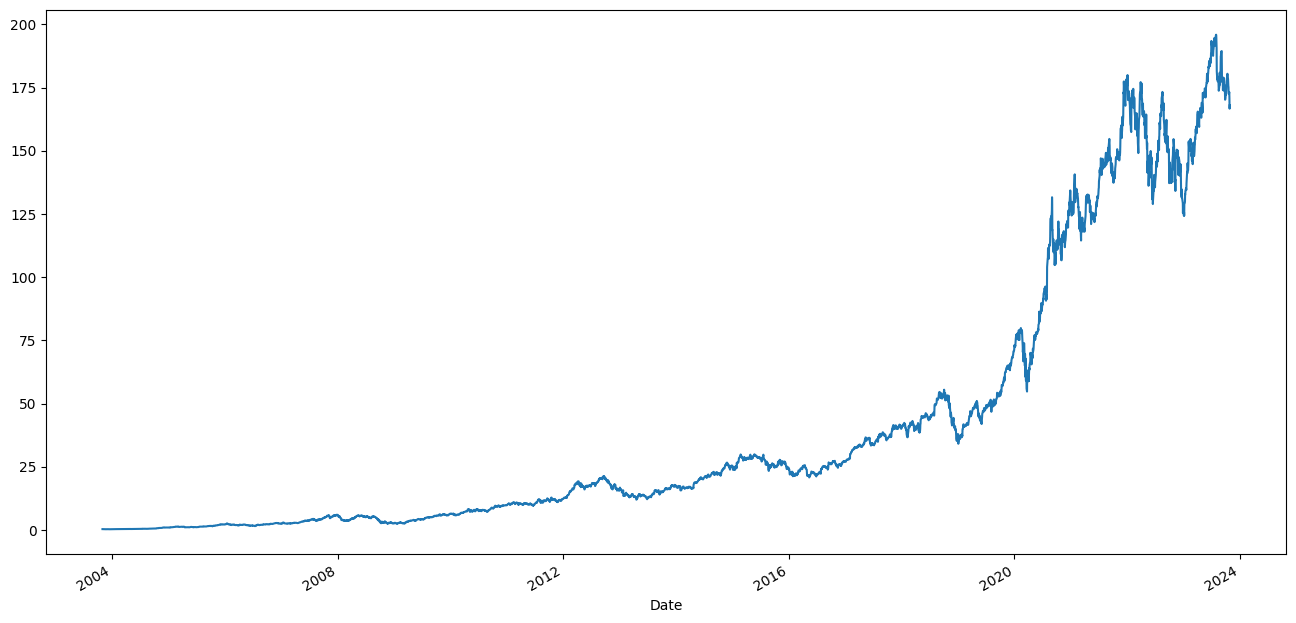

In [4]:
ax, fig = plt.subplots(figsize=(16,8))
data['Adj Close'].plot(kind="line")

In [5]:
aapl = data['Adj Close']

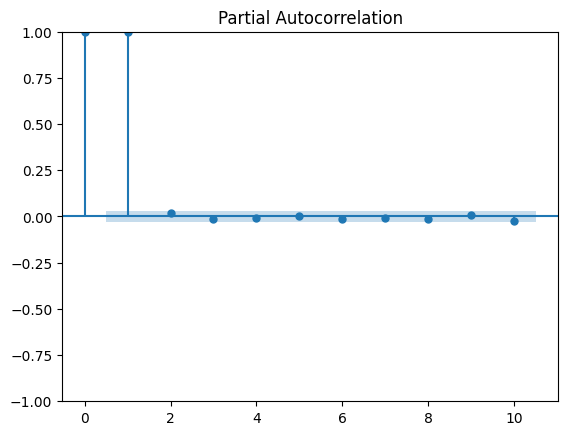

In [6]:
sm.graphics.tsa.plot_pacf(aapl, lags=10)
plt.show()

In [7]:
aapl_tsa = sm.tsa.arima.ARIMA(aapl, order=(1, 1, 10))
aapl_res = aapl_tsa.fit()
print(aapl_res.summary())

c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 5033
Model:                ARIMA(1, 1, 10)   Log Likelihood               -8034.173
Date:                Sat, 09 Dec 2023   AIC                          16092.346
Time:                        15:01:49   BIC                          16170.629
Sample:                             0   HQIC                         16119.774
                               - 5033                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5608      0.117     -4.811      0.000      -0.789      -0.332
ma.L1          0.5337      0.117      4.568      0.000       0.305       0.763
ma.L2         -0.0516      0.008     -6.860      0.0

In [9]:
forecast_model = aapl_res.get_forecast(steps=10)
forecast_CI = forecast_model.conf_int()
forecast_mean = forecast_model.predicted_mean


forecast_mean

c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


5033    168.116318
5034    168.100088
5035    168.122005
5036    167.883556
5037    167.986418
5038    167.950400
5039    168.074833
5040    167.876644
5041    168.018508
5042    167.937511
Name: predicted_mean, dtype: float64